In [2]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import io
import requests
import itertools
from datetime import date

#change date format
def to_ymd (date):
    return '-'.join([x if (len(x)>1) else '0' + x for x in date.split('/')][::-1])

In [3]:
#Download and save
##THEY KEEP CHANGING THE FORMAT OF THE FUCKING FILE!!!!!!

url = 'https://covid19.isciii.es/resources/serie_historica_acumulados.csv'
dataEsp = pd.read_csv(url, encoding = 'latin1', error_bad_lines=False)
dataEsp = dataEsp.fillna(0)
dataEsp = dataEsp[:-8]
dataEsp['FECHA'] = dataEsp['FECHA'].apply(to_ymd)
dataEsp.to_csv('datosciii/covid_ciii' + str(date.today()), encoding = 'latin1')

#Group by CCAA and date
dataEsp=dataEsp.pivot_table(index='CCAA', columns='FECHA', values=['CASOS','Fallecidos','Hospitalizados','UCI'])
dataEsp.columns = dataEsp.columns.swaplevel(0,1)
dataEsp.sort_index(axis=1, level=0, inplace=True)

dates = list(dict.fromkeys(dataEsp.columns.get_level_values(0)))

b'Skipping line 1739: expected 8 fields, saw 9\n'


In [4]:
dataEsp

FECHA 2020-02-20                                2020-02-21             \
           CASOS Fallecidos Hospitalizados  UCI      CASOS Fallecidos   
CCAA                                                                    
AN           0.0        0.0            0.0  0.0        0.0        0.0   
AR           0.0        0.0            0.0  0.0        0.0        0.0   
AS           0.0        0.0            0.0  0.0        0.0        0.0   
CB           0.0        0.0            0.0  0.0        0.0        0.0   
CE           0.0        0.0            0.0  0.0        0.0        0.0   
CL           0.0        0.0            0.0  0.0        0.0        0.0   
CM           0.0        0.0            0.0  0.0        0.0        0.0   
CN           0.0        0.0            0.0  0.0        0.0        0.0   
CT           0.0        0.0            0.0  0.0        0.0        0.0   
EX           0.0        0.0            0.0  0.0        0.0        0.0   
GA           0.0        0.0            0.0  0.0        0.0        0.0   
IB           0.0        0.0            0.0  0.0        0.0        0.0   
MC           0.0        0.0            0.0  0.0        0.0        0.0   
MD           0.0        0.0            0.0  0.0        0.0        0.0   
ML           0.0        0.0            0.0  0.0        0.0        0.0   
NC           0.0        0.0            0.0  0.0        0.0        0.0   
PV           0.0        0.0            0.0  0.0        0.0        0.0   
RI           0.0        0.0            0.0  0.0        0.0        0.0   
VC           0.0        0.0           26.0  0.0        0.0        0.0   

FECHA                     2020-02-22             ...     2020-05-18          \
      Hospitalizados  UCI      CASOS Fallecidos  ... Hospitalizados     UCI   
CCAA                                             ...                          
AN               0.0  0.0        0.0        0.0  ...         6182.0   760.0   
AR               0.0  0.0        0.0        0.0  ...         2667.0   255.0   
AS               0.0  0.0        0.0        0.0  ...         1088.0   121.0   
CB               0.0  0.0        0.0        0.0  ...         1035.0    79.0   
CE               0.0  0.0        0.0        0.0  ...           11.0     4.0   
CL               0.0  0.0        0.0        0.0  ...         8729.0   551.0   
CM               0.0  0.0        0.0        0.0  ...         9082.0   638.0   
CN               0.0  0.0        0.0        0.0  ...          942.0   178.0   
CT               0.0  0.0        0.0        0.0  ...        29459.0  2960.0   
EX               0.0  0.0        0.0        0.0  ...         1779.0   110.0   
GA               0.0  0.0        0.0        0.0  ...         2935.0   332.0   
IB               0.0  0.0        0.0        0.0  ...         1137.0   168.0   
MC               0.0  0.0        0.0        0.0  ...          679.0   112.0   
MD               0.0  0.0        0.0        0.0  ...        42350.0  3600.0   
ML               0.0  0.0        0.0        0.0  ...           44.0     3.0   
NC               0.0  0.0        0.0        0.0  ...         2045.0   136.0   
PV               0.0  0.0        0.0        0.0  ...         7021.0   578.0   
RI               0.0  0.0        0.0        0.0  ...         1498.0    91.0   
VC              30.0  1.0        0.0        0.0  ...         5738.0   727.0   

FECHA 2020-05-19                                   2020-05-20             \
           CASOS Fallecidos Hospitalizados     UCI      CASOS Fallecidos   
CCAA                                                                       
AN           0.0     1371.0         6196.0   764.0        0.0     1375.0   
AR           0.0      847.0         2434.0   255.0        0.0      848.0   
AS           0.0      304.0         1089.0   121.0        0.0      307.0   
CB           0.0      209.0         1036.0    79.0        0.0      209.0   
CE           0.0        4.0           11.0     4.0        0.0        4.0   
CL           0.0     1960.0         8734.0   5

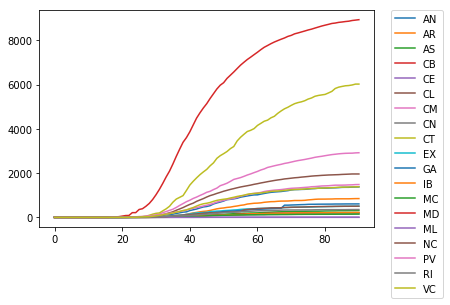

In [9]:
#tests
def plotV (var):
    if var in ['CASOS', 'Fallecidos', 'UCI', 'Hospitalizados']:
        for ccaa in dataEsp.index:
            plt.plot(dates,[dataEsp[d,var][ccaa] for d in dates], label = ccaa)
        plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left', borderaxespad=0.)
        plt.xticks([dates[i] for i in range(len(dates)) if i%2==0], rotation = 'vertical')
        plt.title(var)
        plt.show()
        
for ccaa in dataEsp.index:
    plt.plot([dataEsp[d,'Fallecidos'][ccaa] for d in dates], label=ccaa)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

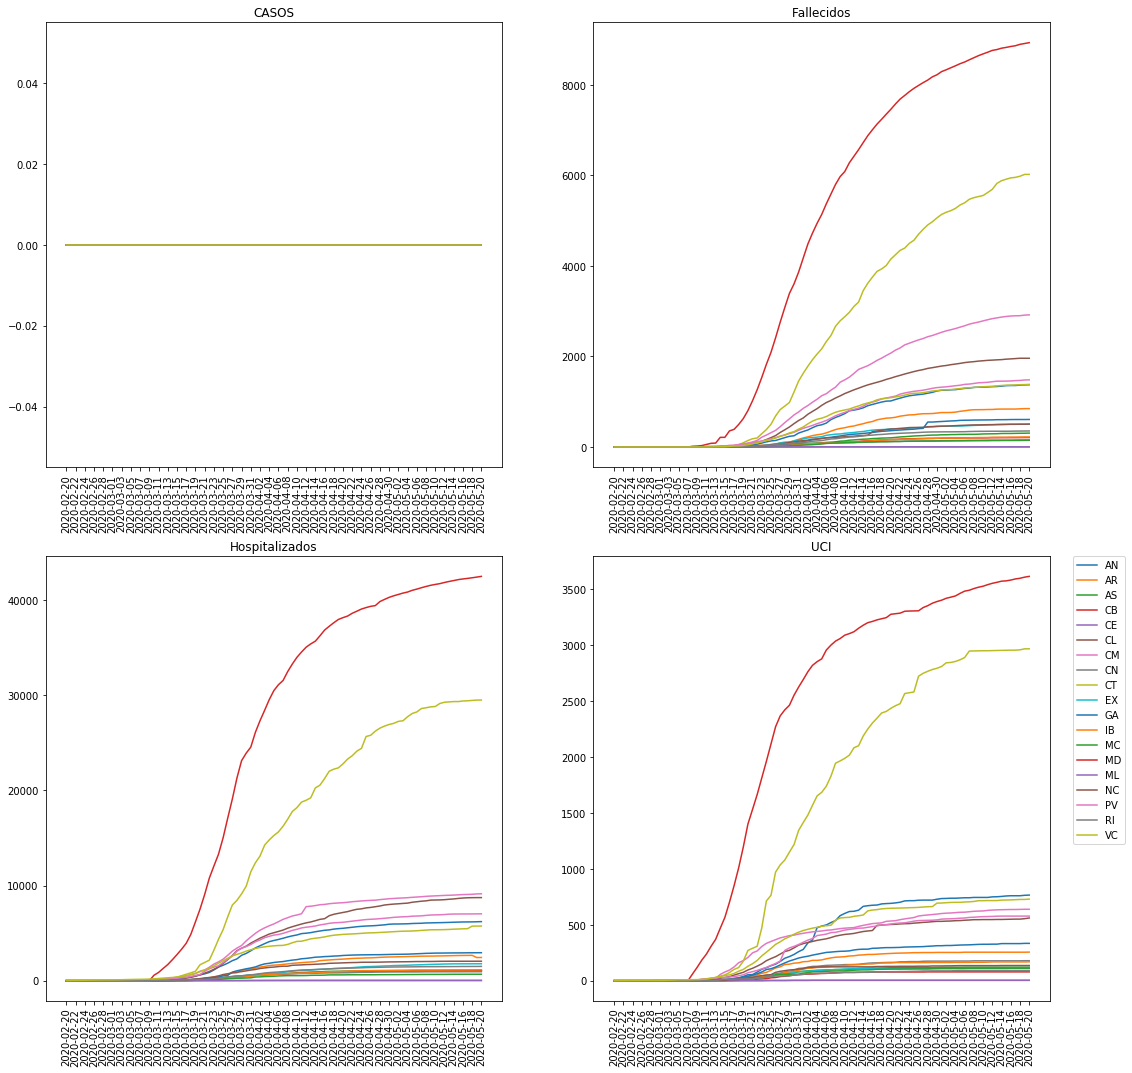

In [10]:
plt.figure(figsize=(18,18))
for i in range(4):
    var = dataEsp.columns[i][1]
    plt.subplot(2, 2, i+1)
    for ccaa in dataEsp.index:
        plt.plot(dates,[dataEsp[d,var][ccaa] for d in dates], label = ccaa)
    plt.xticks([dates[i] for i in range(len(dates)) if i%2==0], rotation = 'vertical')
    plt.title(var)
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('plots_byccaa/allccaa'+str(date.today()))
plt.show()

In [8]:
dataEsp

FECHA 2020-02-20                                2020-02-21             \
           CASOS Fallecidos Hospitalizados  UCI      CASOS Fallecidos   
CCAA                                                                    
AN           0.0        0.0            0.0  0.0        0.0        0.0   
AR           0.0        0.0            0.0  0.0        0.0        0.0   
AS           0.0        0.0            0.0  0.0        0.0        0.0   
CB           0.0        0.0            0.0  0.0        0.0        0.0   
CE           0.0        0.0            0.0  0.0        0.0        0.0   
CL           0.0        0.0            0.0  0.0        0.0        0.0   
CM           0.0        0.0            0.0  0.0        0.0        0.0   
CN           0.0        0.0            0.0  0.0        0.0        0.0   
CT           0.0        0.0            0.0  0.0        0.0        0.0   
EX           0.0        0.0            0.0  0.0        0.0        0.0   
GA           0.0        0.0            0.0  0.0        0.0        0.0   
IB           0.0        0.0            0.0  0.0        0.0        0.0   
MC           0.0        0.0            0.0  0.0        0.0        0.0   
MD           0.0        0.0            0.0  0.0        0.0        0.0   
ML           0.0        0.0            0.0  0.0        0.0        0.0   
NC           0.0        0.0            0.0  0.0        0.0        0.0   
PV           0.0        0.0            0.0  0.0        0.0        0.0   
RI           0.0        0.0            0.0  0.0        0.0        0.0   
VC           0.0        0.0           26.0  0.0        0.0        0.0   

FECHA                     2020-02-22             ...     2020-05-18          \
      Hospitalizados  UCI      CASOS Fallecidos  ... Hospitalizados     UCI   
CCAA                                             ...                          
AN               0.0  0.0        0.0        0.0  ...         6182.0   760.0   
AR               0.0  0.0        0.0        0.0  ...         2667.0   255.0   
AS               0.0  0.0        0.0        0.0  ...         1088.0   121.0   
CB               0.0  0.0        0.0        0.0  ...         1035.0    79.0   
CE               0.0  0.0        0.0        0.0  ...           11.0     4.0   
CL               0.0  0.0        0.0        0.0  ...         8729.0   551.0   
CM               0.0  0.0        0.0        0.0  ...         9082.0   638.0   
CN               0.0  0.0        0.0        0.0  ...          942.0   178.0   
CT               0.0  0.0        0.0        0.0  ...        29459.0  2960.0   
EX               0.0  0.0        0.0        0.0  ...         1779.0   110.0   
GA               0.0  0.0        0.0        0.0  ...         2935.0   332.0   
IB               0.0  0.0        0.0        0.0  ...         1137.0   168.0   
MC               0.0  0.0        0.0        0.0  ...          679.0   112.0   
MD               0.0  0.0        0.0        0.0  ...        42350.0  3600.0   
ML               0.0  0.0        0.0        0.0  ...           44.0     3.0   
NC               0.0  0.0        0.0        0.0  ...         2045.0   136.0   
PV               0.0  0.0        0.0        0.0  ...         7021.0   578.0   
RI               0.0  0.0        0.0        0.0  ...         1498.0    91.0   
VC              30.0  1.0        0.0        0.0  ...         5738.0   727.0   

FECHA 2020-05-19                                   2020-05-20             \
           CASOS Fallecidos Hospitalizados     UCI      CASOS Fallecidos   
CCAA                                                                       
AN           0.0     1371.0         6196.0   764.0        0.0     1375.0   
AR           0.0      847.0         2434.0   255.0        0.0      848.0   
AS           0.0      304.0         1089.0   121.0        0.0      307.0   
CB           0.0      209.0         1036.0    79.0        0.0      209.0   
CE           0.0        4.0           11.0     4.0        0.0        4.0   
CL           0.0     1960.0         8734.0   5